In [28]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [29]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [30]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile

In [31]:
survey  = 'gama'
version = 'GAMA4'
dryrun  = False

In [46]:
# TODO: better variable names, e.g: gama_lf --> lumfn

fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
49666,587722982295273988,221.89800269,-0.6415381,19.241835,0.12458,4,G15_Y1_HS2_033,6,19.763887,19.138214,18.93341,18.772236,19.113127,0.12458,409.8743148290063,38.06325351842394,G15,0,-271.2698035537147,-243.37940556486063,-4.080854256126575,273.30030998287657,241.09224426149586,-4.354889763758178,0.20480347,19.241835,0.1764508816620914,0,1,-0.11560051726479544,-0.08724793213001185,0.04724741726236183,0.051157136749574075,0.20089374730966275,2.12,-0.120842606,-0.26410958,-18.747823689354135,-18.604556713474466,-18.868666295183374,37.989658329857065,38.110500935686304,37.846391353977396,-0.08621053192172294,-0.04868873366801386,0.13051434644047816,0.21648655604564943,-18.83109061853225,0.5581646,0.16536951392988855,0.0,-7.2418346,0.004393118907537945,0.0
139025,587724650333077845,185.31240015,-1.71745883,19.589233,0.07201,3,G12_Y2_005_095,5,20.732338,19.895437,19.584732,19.327354,19.398808,0.07201,228.23871532041073,36.7919465707857,G12,0,-211.89751863006472,-19.70339365082965,-6.381005589922235,212.0490405347563,17.922830436436097,-6.593626673755219,0.31070518,19.589233,0.33415436331369053,0,2,-0.10868117918692531,-0.1321303575636103,0.06394546216931761,0.04512917199872368,0.3295214751071174,2.12,-0.06984971,-0.1526612,-17.196808927331293,-17.11399743017944,-17.266658634517515,36.78604232576879,36.85589203295501,36.70323082861694,-0.12718171114218854,-0.1593859955398793,0.08954316722001257,0.10578929417378397,-17.222406632381986,0.21076584,0.07941366026455443,0.0,-7.5892334,0.0022154311730883565,0.0
214264,587725075524682122,129.50683691,0.52589209,18.379673,0.07826,4,G09_Y1_test_116,6,21.10666,19.103128,18.255648,17.893887,17.584246,0.07826,249.18607796654842,36.98261887309769,G9,0,-147.0128822160159,178.2975350217959,2.12113451328627,145.51211007838148,-179.52610400322502,1.9752331235584817,0.8474808,18.379673,0.8946003556432679,0,6,-0.13080627362114147,-0.17792585533862826,0.09635386685755401,0.19452459258337634,0.749310048199959,0.8,-0.0759122,-0.062607996,-18.6233875358904,-18.636691739639105,-18.699299735804857,37.00306054004079,37.07897273995525,37.016364743789495,-0.12145697371273845,-0.1475490985789903,0.09526790464946266,0.11762619113467299,-18.622301573682307,1.4203262,0.1420511737557886,0.0,-6.379673,0.0044525628514350945,0.0
536269,588848898839543956,181.39347962,-0.85282612,17.191727,0.15774,5,322041491755132928,6,19.97562,18.241964,17.1869,16.784622,16.485594,0.15774,530.636077190221,38.62398386856322,G12,0,-458.15155993384866,-11.144813340761596,-6.821934742361414,458.2219394709942,7.296100659330028,-7.281389321955303,1.0550652,17.191727,0.9020483886914233,0,6,-0.03035639699275043,0.12266036934512314,0.19666854631768815,0.4978189925335285,0.7539147088134566,0.8,-0.1530078,-0.126192,-21.475917924963156,-21.502733726822058,-21.6289257303106,38.66764460953347,38.82065241488091,38.69

In [33]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

MCOLOR_0P0,ZGAMA,ZMIN,FIELD,WEIGHT_STEPWISE,ZMAX,IN_D8LUMFN,VMAX,VZ
mag,,,,,,,,
float64,float32,float64,bytes3,float64,float64,int64,float64,float64
-18.604556713474466,0.12458,0.03903000056743622,G15,2.9154826542283168,0.16536951392988855,0,1989415.1173069389,856251.0919558892
-17.11399743017944,0.07201,0.03903000056743622,G12,1.6538945935980034,0.07941366026455443,0,206911.28313956544,147757.13652707596
-18.636691739639105,0.07826,0.03903000056743622,G9,1.8026043529105287,0.1420511737557886,0,1269160.6371459882,196949.02424263215
-21.502733726822058,0.15774,0.03903000056743622,G12,4.055363565159679,0.26298999786376953,0,7594841.612883208,1731165.271538042
-19.433183926472903,0.15464,0.03903000056743622,G9,4.055363565159679,0.19594298885874487,0,3264168.438401783,1632645.5786324611
-20.100998160222886,0.10636,0.03903000056743622,G12,2.641752036027377,0.25972323287594257,0,7330030.538789366,528161.9353389031
-20.67997312087086,0.21078,0.03903000056743622,G9,6.092189398390652,0.26298999786376953,0,7594841.612883208,4031555.38349436
-19.131149226207985,0.08423,0.03903000056743622,G12,1.989860106214467,0.2020584584880216,0,3568145.049230486,251613.6194825457


Text(0.5, 0, 'ZMAX')

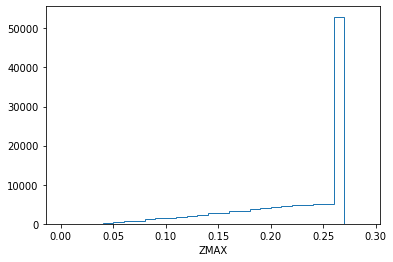

In [34]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [35]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

In [40]:
## TODO: FIX THIS IN CODE

try:
    gama_zmax['ZSURV'] = gama_zmax['ZGAMA']
    gama_vmax['ZSURV'] = gama_vmax['ZGAMA']
except:
    pass

Text(0, 0.5, '$z_{\\rm max}$')

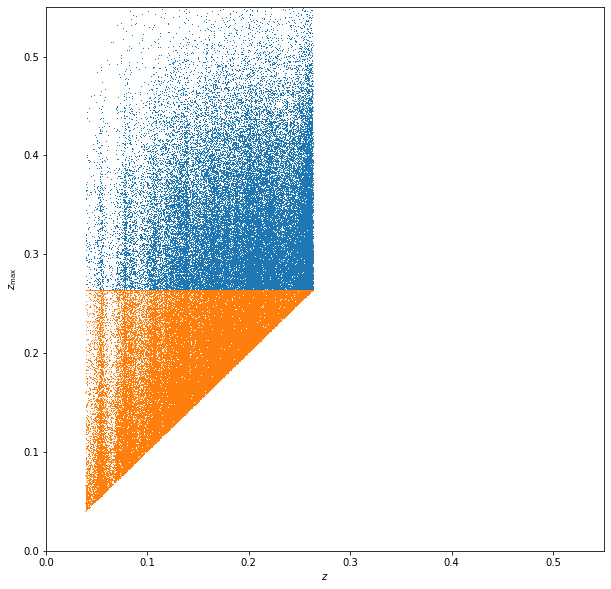

In [41]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

# ax.axvline(zmin, c='k', lw=0.5) 
# ax.axvline(zmax, c='k', lw=0.5) 
 
# ax.axhline(zmin, c='k', lw=0.5) 
# ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

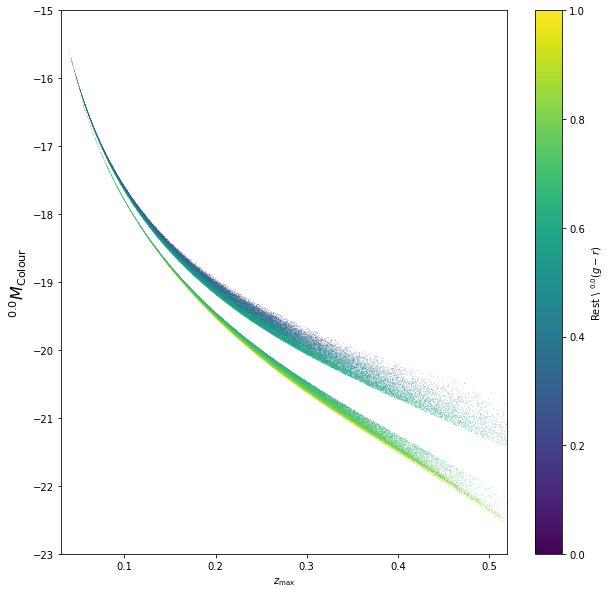

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

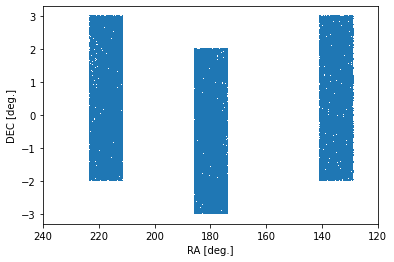

In [43]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [44]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.4,0.0,0.0,0.0,0.0,0.0,--
-25.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-25.0,0.0,0.0,0.0,0.0,0.0,--
-24.800000000000004,0.0,0.0,0.0,0.0,0.0,--
-24.6,0.0,0.0,0.0,0.0,0.0,--
-24.400000000000006,0.0,0.0,0.0,0.0,0.0,--
-24.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-24.000000000000007,0.0,0.0,0.0,0.0,0.0,--
-23.800000000000004,0.0,0.0,0.0,0.0,0.0,--


/tmp/ipykernel_166563/304461241.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'] + 0.12, np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
/tmp/ipykernel_166563/304461241.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'] + 0.12, np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)


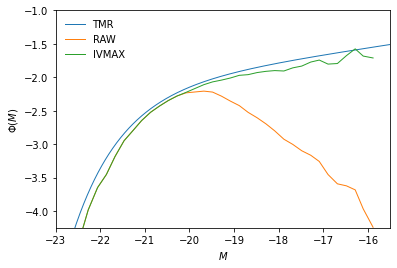

In [45]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR', lw=1.)

pl.plot(gama_lf['MEDIAN_M'] + 0.12, np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
pl.plot(gama_lf['MEDIAN_M'] + 0.12, np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, '$V/V_{Max}$')

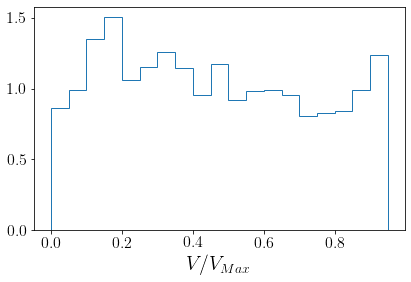

In [14]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

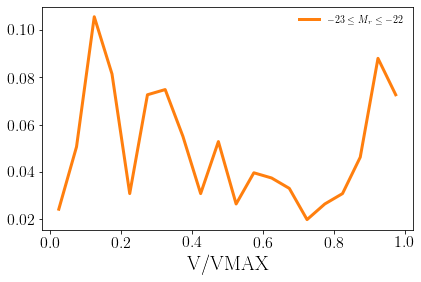

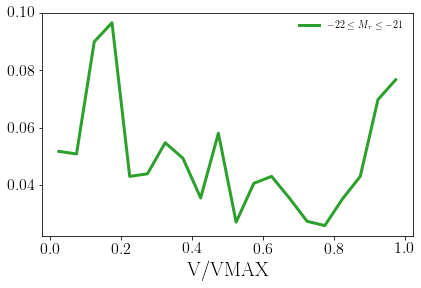

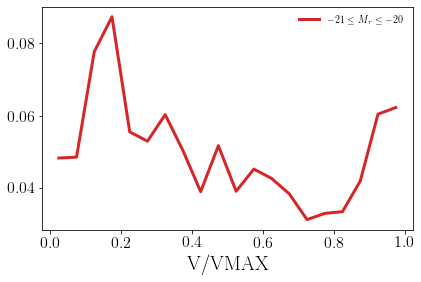

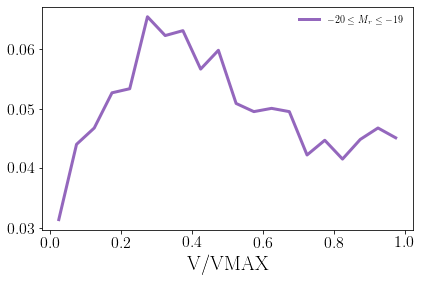

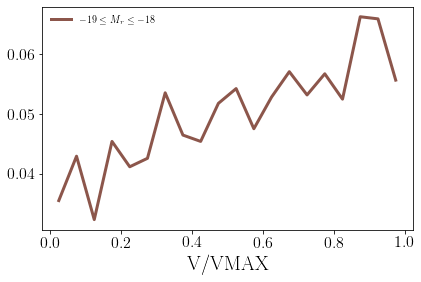

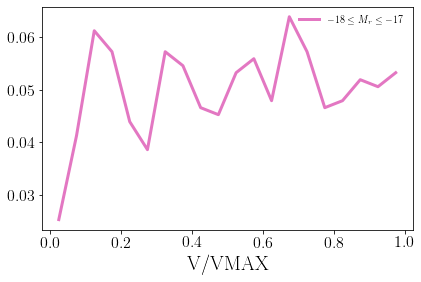

In [15]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [16]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,FIELD,GAMA_FIELD,GMAG_DRED,RMAG_DRED,W1MAG_DRED,W2MAG_DRED,GMR,DETMAG,IN_GOLD,IN_CLUSTERING,IN_FULL,WEIGHT_ZFAIL,WEIGHT,NZ,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,COMP_TILE,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,LUMDIST,DISTMOD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,GAMA_SEP,GOOD_MATCH,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,bytes3,float32,float32,float32,float32,float32,float32,bool,bool,bool,float64,float64,float64,int64,bytes43,bytes143,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,bool,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
39627818572710520,1202241.605360508,0.9429144917191675 .. 0.0,1.825727166788996e-06,0,7924,QSO,,4,3215173.7399184704,0,217.27740042366204,1.2849880635834952,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.028359974894821005,516,9010,338437,632,SER,818.8496,1293.6177,1709.2017,4.625657,2.1619487,0.64393705,4252,1213880,L3,0.0,0.0,0.0,0.0,2173p012,0.031856652,9360.985,12238.661,0.051350605,0.016978078,204.81372,323.56448,427.5119,204.81964,323.57758,427.53696,6.0,2.0854576,-0.006809668,0.069938,S,102100,9,1152921504606846976,131074,0,0,0,0,0,217.27740042366204,1.2849880635834952,3,1392.8936,3,2,0.0056666667,0.006027714,-0.0016666667,0.005066228,217.27742252642966,0.030448465,1.284993849752379,0.06623795,0.7269692,10,1.3810558931980847,True,0.0864403087710786,R10,G15,15.114603,14.651516,12.565834,12.277065,0.46308708,14.651516,True,True,True,1.0,1.0,0.05193202492732345,10,282-283-284

In [17]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,FIELD,GAMA_FIELD,GMAG_DRED,RMAG_DRED,W1MAG_DRED,W2MAG_DRED,GMR,DETMAG,IN_GOLD,IN_CLUSTERING,IN_FULL,WEIGHT_ZFAIL,WEIGHT,NZ,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,COMP_TILE,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,LUMDIST,DISTMOD,CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,GAMA_SEP,GOOD_MATCH,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,,,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,bytes3,float32,float32,float32,float32,float32,float32,bool,bool,bool,float64,float64,float64,int64,bytes43,bytes143,bool,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,bool,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.